In [31]:
import pandas as pd
import numpy as np
import os, time,json
import tmdbsimple as tmdb
from tqdm.notebook import tqdm_notebook
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
df = pd.concat([df_2000,df_2001] )

In [33]:
Pgrating= df.loc[df['certification']=='PG',"revenue"]
Pg13rating= df.loc[df['certification']=='PG-13',"revenue"]
Rrating=df.loc[df['certification']=='R',"revenue"]
Grating=df.loc[df['certification']=='G',"revenue"]
NRrating=df.loc[df['certification']=='NR',"revenue"]

In [35]:
print(f"For PG ratings(n={len(Pgrating)}): Mean={np.mean(Pgrating):.2f}")
print(f"For PG-13 ratings(n={len(Pg13rating)}): Mean={np.mean(Pg13rating):.2f}")
print(f"For R ratings(n={len(Rrating)}): Mean={np.mean(Rrating):.2f}")
print(f"For G ratings(n={len(Grating)}): Mean={np.mean(Grating):.2f}")
print(f"For NR ratings(n={len(NRrating)}): Mean={np.mean(NRrating):.2f}")

For PG ratings(n=63): Mean=62583103.89
For PG-13 ratings(n=183): Mean=71057113.56
For R ratings(n=458): Mean=16605658.66
For G ratings(n=24): Mean=72185327.04
For NR ratings(n=70): Mean=2158419.93


In [36]:
result = stats.normaltest(Pgrating)
result.pvalue

5.3367088579091804e-20

In [37]:
result = stats.normaltest(Pg13rating)
result.pvalue

7.619494371338404e-31

In [38]:
result = stats.normaltest(Rrating)
result.pvalue

2.65983081636423e-103

In [39]:
result = stats.normaltest(Grating)
result.pvalue

1.1968581356016258e-08

In [40]:
result = stats.normaltest(NRrating)
result.pvalue

1.4734632498234388e-20

Text(0.5, 1.0, 'Revenue by Rating')

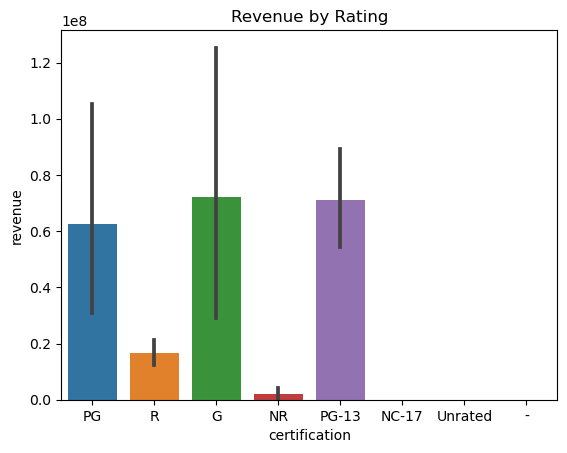

In [54]:
sns.barplot(data=df, x='certification',y='revenue')
plt.title('Revenue by Rating')

In [ ]:
#Studies show that movies with a G rating have the highest revenue

In [3]:
'Grating'-'Pgrating'

TypeError: unsupported operand type(s) for -: 'str' and 'str'